In [1]:
#library loadings
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
red_wines = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
# print(red_wines.shape)
red_wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
red_wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
red_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


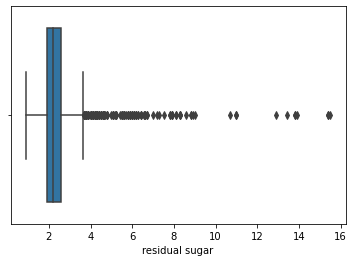

In [6]:
sns.boxplot(red_wines['residual sugar'])

In [7]:
z = np.abs(stats.zscore(red_wines))
red_wines = red_wines[(z < 3).all(axis=1)]
red_wines.shape

(1451, 12)

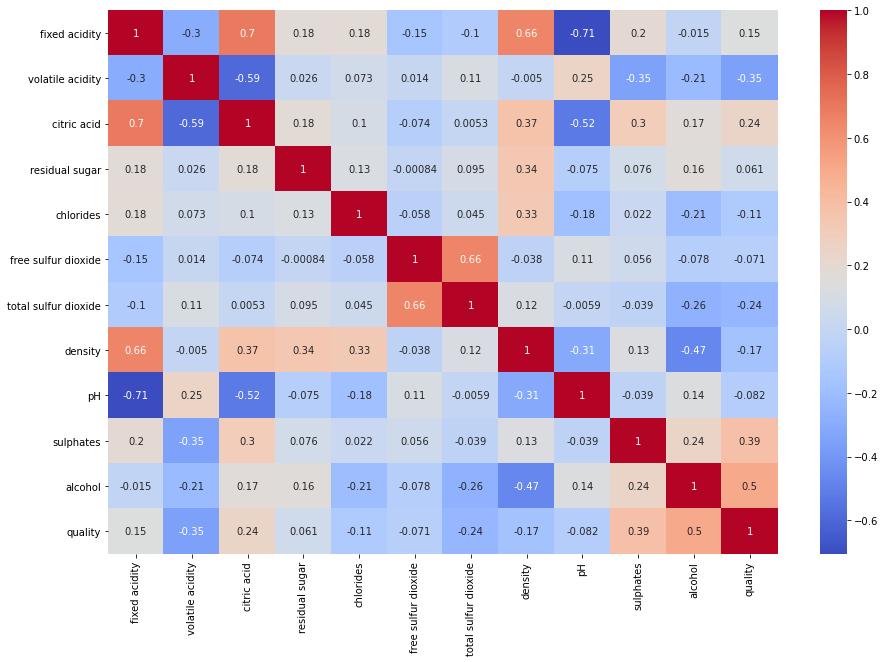

In [8]:
plt.subplots(figsize=(15, 10))
sns.heatmap(red_wines.corr(), annot = True, cmap = 'coolwarm')

In [9]:
red_wines['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [10]:
# Define features X
X = np.asarray(red_wines.iloc[:,:-1]) 
# Define target y
y = np.asarray(red_wines['quality'])

In [11]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [12]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [13]:
X

array([[-0.55292997,  1.05091371, -1.39039974, ...,  1.37589608,
        -0.63645843, -0.99985592],
       [-0.3099004 ,  2.11933582, -1.39039974, ..., -0.8219512 ,
         0.2883529 , -0.6081737 ],
       [-0.3099004 ,  1.40705441, -1.18083057, ..., -0.3965614 ,
         0.05715007, -0.6081737 ],
       ...,
       [-1.22126131, -0.07686519, -0.70929993, ...,  0.73781138,
         0.82782618,  0.56687296],
       [-1.46429088,  0.72445139, -0.76169222, ...,  1.80128587,
         0.51955574, -0.21649148],
       [-1.40353349, -1.26400088,  1.07203802, ...,  0.52511649,
         0.13421768,  0.56687296]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1160, 11) (1160,)
Test set: (291, 11) (291,)


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [16]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# classification report for test set
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))

# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring = 'accuracy',cv=10)

print('cross validation score',accuracy.mean())

# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring = 'roc_auc_ovr',cv=10)

print('cross validation score with roc_auc',accuracy.mean())# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,knn.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        11
           5      0.611     0.684     0.645       117
           6      0.522     0.574     0.547       122
           7      0.462     0.324     0.381        37
           8      1.000     0.000     0.000         4

    accuracy                          0.557       291
   macro avg      0.719     0.316     0.315       291
weighted avg      0.575     0.557     0.537       291

cross validation score 0.5665658951346245
cross validation score with roc_auc 0.7017253780930435
roc_auc_score 0.7435990826127948


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Train and fit model
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(X_train, y_train)

# Predict out-of-sample test set
y_pred = logreg.predict(X_test)

# classification report
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print('accuracy',accuracy_score(y_test, y_pred))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(logreg, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,logreg.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        11
           5      0.615     0.709     0.659       117
           6      0.566     0.598     0.582       122
           7      0.556     0.405     0.469        37
           8      1.000     0.000     0.000         4

    accuracy                          0.588       291
   macro avg      0.747     0.343     0.342       291
weighted avg      0.607     0.588     0.568       291

accuracy 0.5876288659793815
cross validation score with roc_auc 0.7984175315308614
roc_auc_score 0.7795082629665615


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Add polynomial features to the logistic regression model
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LogisticRegression(multi_class='multinomial',solver ='newton-cg', **kwargs))

In [20]:
# Train and fit the 3rd degree polynomial regression model
poly = PolynomialRegression(3)
poly.fit(X_train,y_train)
# Test out-of-sample test set
y_pred = poly.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred, digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(poly, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,poly.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.167     0.182     0.174        11
           5      0.685     0.650     0.667       117
           6      0.624     0.680     0.651       122
           7      0.656     0.568     0.609        37
           8      0.333     0.250     0.286         4

    accuracy                          0.629       291
   macro avg      0.493     0.466     0.477       291
weighted avg      0.631     0.629     0.629       291

cross validation score with roc_auc_ovr scoring 0.6377119593508278
roc_auc_score 0.7005242323750944


# Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Train and fit the Decision Tree Classification model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
# Evaluate the model with out-of-sample test set
y_pred = tree.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(tree, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,tree.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.200     0.091     0.125        11
           5      0.699     0.675     0.687       117
           6      0.632     0.648     0.640       122
           7      0.467     0.568     0.512        37
           8      0.333     0.250     0.286         4

    accuracy                          0.622       291
   macro avg      0.466     0.446     0.450       291
weighted avg      0.618     0.622     0.618       291

cross validation score with roc_auc_ovr scoring 0.5843940487030195
roc_auc_score 0.6647897124956815


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(X_train, y_train)
# Test out-of-sample test set
y_pred = forest.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovr'))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           4      0.000     0.000     0.000        11
           5      0.711     0.821     0.762       117
           6      0.690     0.713     0.702       122
           7      0.793     0.622     0.697        37
           8      1.000     0.250     0.400         4

    accuracy                          0.711       291
   macro avg      0.639     0.481     0.512       291
weighted avg      0.690     0.711     0.695       291

cross validation score with roc_auc_ovr scoring 0.7617443587644102
roc_auc_score 0.8332575905203725


# Adding SMOTE algoritm 

In [25]:
# Import SMOTE module
from imblearn.over_sampling import SMOTE
# Create model and fit the training set to create a new training set
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
# Create random forest model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
# Fit the model to the new train set
forest.fit(X_train_res, y_train_res.ravel())
# Test out-of-sample test set
y_pred = forest.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.062     0.091     0.074        11
           5      0.709     0.709     0.709       117
           6      0.696     0.639     0.667       122
           7      0.605     0.703     0.650        37
           8      0.333     0.250     0.286         4

    accuracy                          0.649       291
   macro avg      0.481     0.478     0.477       291
weighted avg      0.661     0.649     0.654       291

cross validation score with roc_auc_ovr scoring 0.7617443587644102
roc_auc_score 0.8261829250536206


In [26]:
import pickle

pickle.dump(forest, open('model_red_wine.pkl', 'wb'))